In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Jumlah Grid
N = 50

# Parameter
dx = 0.02
dt = dx*dx/4
alpha = dt/(dx*dx)

# titik tengah 
x0 = N*dx/2

In [4]:
# Membuat array sebagai grid
U0 = np.zeros([N+1])
U = np.zeros([N+1])
Unew = np.zeros([N+1])

In [5]:
# array x
x = np.arange(N+1)*dx - x0

# initial value
U0 = np.exp(-100*(x**2))

In [6]:
# Iterasi persamaan difusi

# jumlah iterasi
nt = 200

Ut = []
s = []

# Inisialisasi syarat awal
for i in range(0, N+1):
    U[i] = U0[i]
    
for n in range(1, nt):
    # waktu
    t = n*dt
    
    # menghitung update
    for i in range(1, N):
        Unew[i] = U[i] + alpha*(U[i+1] - 2*U[i] + U[i-1])
        
    # save for next iteration
    for i in range(0, N+1):
        U[i] = Unew[i]
        
    # save for plotting
    #if n%5 == 0:
    Ut.append(list(U))
    s.append('t = ' + str(t))

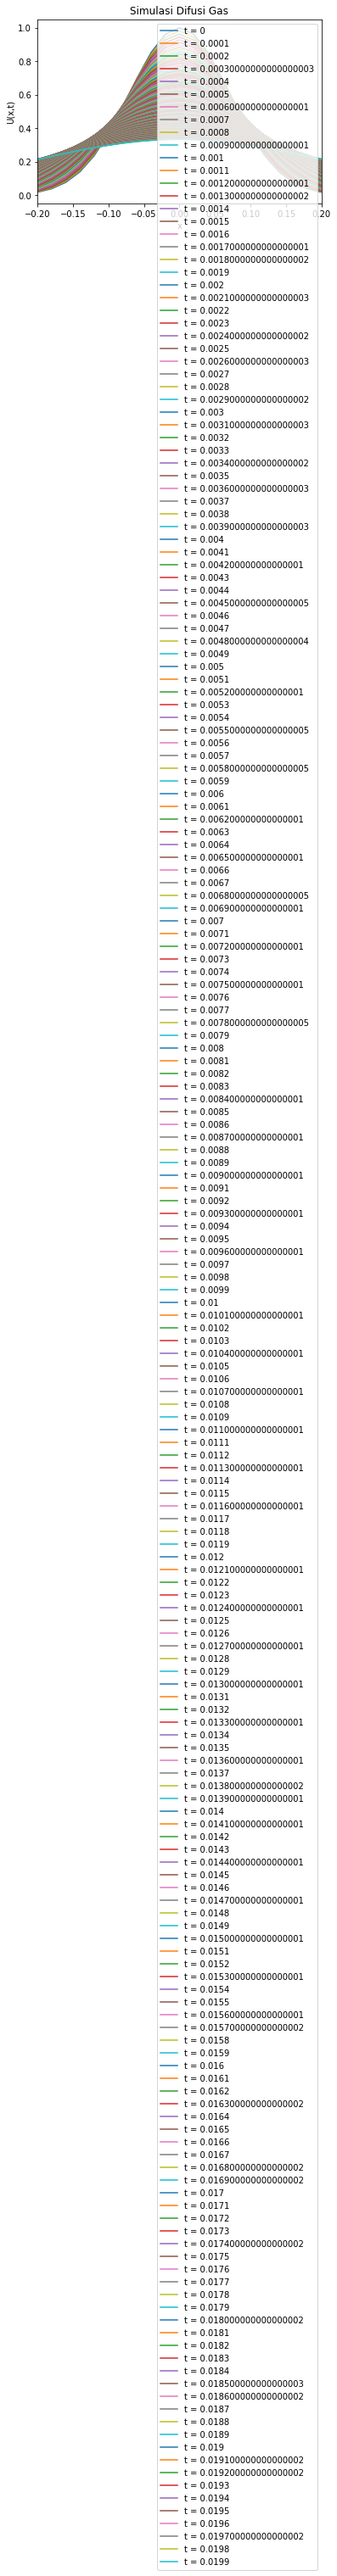

In [7]:
# Visualisasi hasil

Ut.insert(0, U0)
s.insert(0, 't = 0')

# plot
for k in range(len(Ut)):
    plt.plot(x, Ut[k])
plt.title('Simulasi Difusi Gas')
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.xlim([-0.2, 0.2])
plt.legend(s)
plt.show()

In [8]:
import imageio
from IPython.display import Image

In [9]:
# create images using plot
for k in range(len(Ut)):
    plt.plot(x, Ut[k])
    plt.axis("off")
    plt.ylim([0,1])
    filename = "Difusi" + str(k) + ".png"
    plt.xticks(ticks=None)
    plt.savefig(filename)
    plt.close("all")

In [10]:
# create animate gif
images = []
for i in range(len(Ut)):
    filename = "Difusi" + str(i) + ".png"
    images.append(imageio.imread(filename))
imageio.mimsave("Difusi.gif", images)

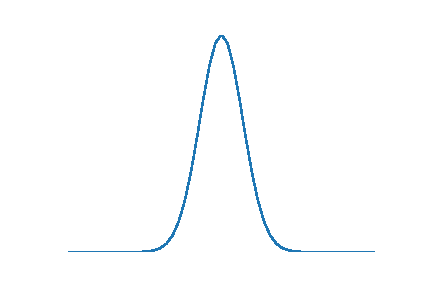

In [11]:
Image("Difusi.gif", width=500, height=300)